# Tickets issued

## Imports

Before everything **else**, the imports:

In [15]:
#!pip install plotly==3.10.0

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
#import plotly.graph_objects as go

## Read and show the data

Then, read the data and take a look at the data:

In [ ]:
data = pd.read_csv("tickets.csv") 
print(data.shape)
print(data.isna().sum())
print(data.dtypes)
data.head()



## Analysis using visualisation

This is a lot of data to look at, in order to get an idea of the data and which features might correlate I will start with a correlation map:

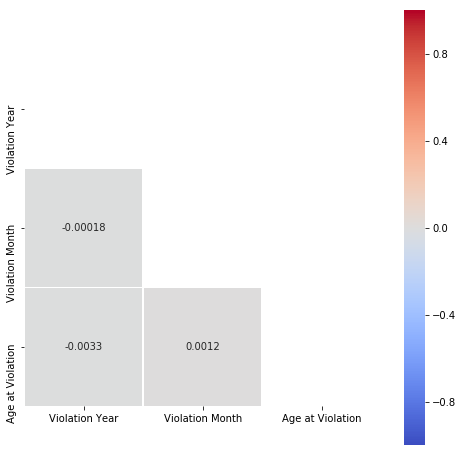

In [12]:
# Remove mirrored correlation
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Size of heatmap
f, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data.corr()
                      , mask=mask
                      , vmin=-1
                      , vmax=1
                      , cmap='coolwarm'
                      , square=True
                      , annot=True
                      , linewidths=.7
)

## Raw analysis

This does not really help us a lot... lets take another less visual look at the data:

In [14]:
import chart_studio.plotly as py
import scipy as sp
import plotly.figure_factory as ff
from plotly import graph_objs as go

fig = go.Figure(data=go.Bar(y=data['l/100 km']))
fig.show()

#data.groupby(['Violation Description']).size().sort_values(ascending=False)

NameError: name 'data' is not defined